# Health care: Heart attack possibility
Autor: Natália Antunes

## 1. Introdução

Este trabalho tem por objetivo aplicar técnicas de aprendizado de máquina estudadas em classe. 
O dataset utlizado neste estudo de caso é o  [Health care: Heart attack possibility](https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility), disponível no [Kaggle](https://www.kaggle.com).

De acordo com a documentação referenciada no [Data Set Description](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), segue a descrição das variáveis disponíveis neste dataset:

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type:
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results:
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment:
Value 1: upsloping
Value 2: flat
Value 3: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (the predicted attribute) num: diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)


## 2. Análise Exploratória dos dados

### Preparação dos Dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Carregando o dataset
df = pd.read_csv("heart.csv", sep=",")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Análise Descritiva

In [5]:
## Descrição das variáveis contínuas do dataset
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
targtable = pd.crosstab(index=df["target"], 
                              columns="Prop")     


(targtable/targtable.sum())*100

## Classes não estão balanceadas, porém aparentemente isso não trará problemas nas análises futuras

col_0,Prop
target,
0,45.544554
1,54.455446


In [7]:
targtable = pd.crosstab(index=df["sex"], 
                              columns="Prop")     


(targtable/targtable.sum())*100

## Classes não estão balanceadas, porém aparentemente isso não trará problemas nas análises futuras

col_0,Prop
sex,
0,31.683168
1,68.316832


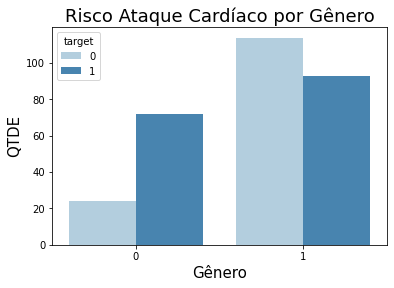

In [8]:
## Distribuição Risco Ataque Cardíaco por Gênero
sns.countplot(x='sex', hue= 'target',data = df, palette="Blues")
plt.title('Risco Ataque Cardíaco por Gênero',fontsize=18) ## 0 Menor Risco 1 Maior Risco
plt.xlabel('Gênero', fontsize=15) ##  0 Feminino 1 Masculino
plt.ylabel('QTDE', fontsize=15)
plt.show()

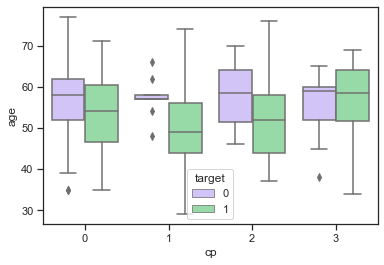

In [9]:
## Plot Dor no peito X Idade por target
## CP: 0 - Angina típica // 1 - Angina atípica // 2 - Dor não anginosa // 3 - Assintomático
## Target: 0 -  Menor chance de sofrer ataque cardíaco // 1 - Maior chance de sofrer ataque cardíaco
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="cp", y="age",
            hue="target", palette=["m", "g"],
            data=df)
plt.show()

## Observar indicação de outliers 

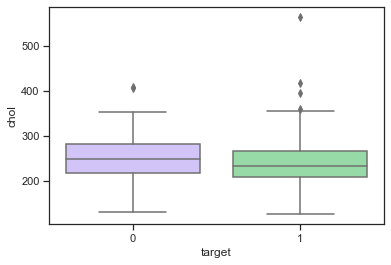

In [10]:
## Plot Colesterol X target
## Target: 0 -  Menor chance de sofrer ataque cardíaco // 1 - Maior chance de sofrer ataque cardíaco
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y="chol", x="target", palette=["m", "g"],data=df)
plt.show()

## Observar indicação de outliers 
## Dados não são assimétricos
## Aparentemente não há uma grande variabilidade entre os níveis de colesterol e a chance de sofrer ataque cardíaco

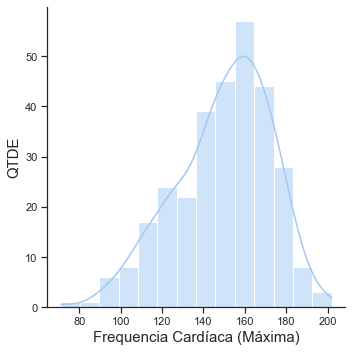

In [11]:
## Distribuição da variável Frequência cardíaca máxima
sns.displot(data=df, x="thalach", kde=True)
plt.xlabel('Frequencia Cardíaca (Máxima)', fontsize=15)
plt.ylabel('QTDE', fontsize=15)

plt.show()

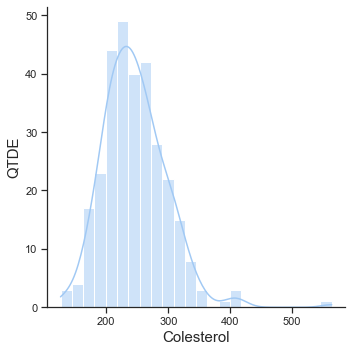

In [12]:
## Distribuição da variável Colesterol
sns.displot(data=df, x="chol", kde=True)
plt.xlabel('Colesterol', fontsize=15)
plt.ylabel('QTDE', fontsize=15)

plt.show()

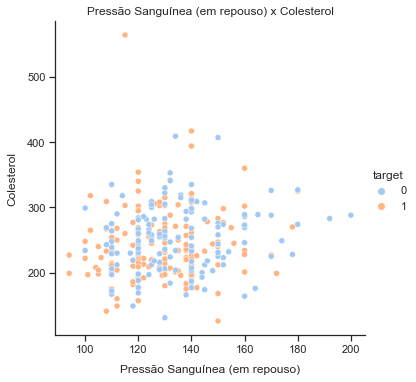

In [13]:
# Grafico relacionando a Pressão Sanguínea do paciente ao entrar no hospital pelo colesterol 
ps=sns.relplot(x="trestbps",y="chol",hue = "target",data=df)
ps.set_axis_labels("Pressão Sanguínea (em repouso)", "Colesterol", labelpad=10)
ps.set(title='Pressão Sanguínea (em repouso) x Colesterol')
plt.show()

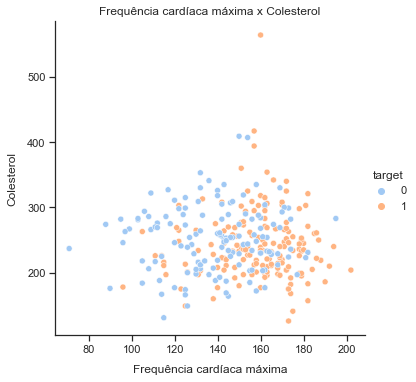

In [14]:
# Grafico relacionando a Frequência cardíaca máxima alcançada 
ps=sns.relplot(x="thalach",y="chol",hue = "target",data=df)
ps.set_axis_labels("Frequência cardíaca máxima", "Colesterol", labelpad=10)
ps.set(title='Frequência cardíaca máxima x Colesterol')
plt.show()
## Observar que aparentemente há uma tendencia crescente entre o aumento da frequencia cardíaca e a chance de sofrer ataque
## cardíaco.


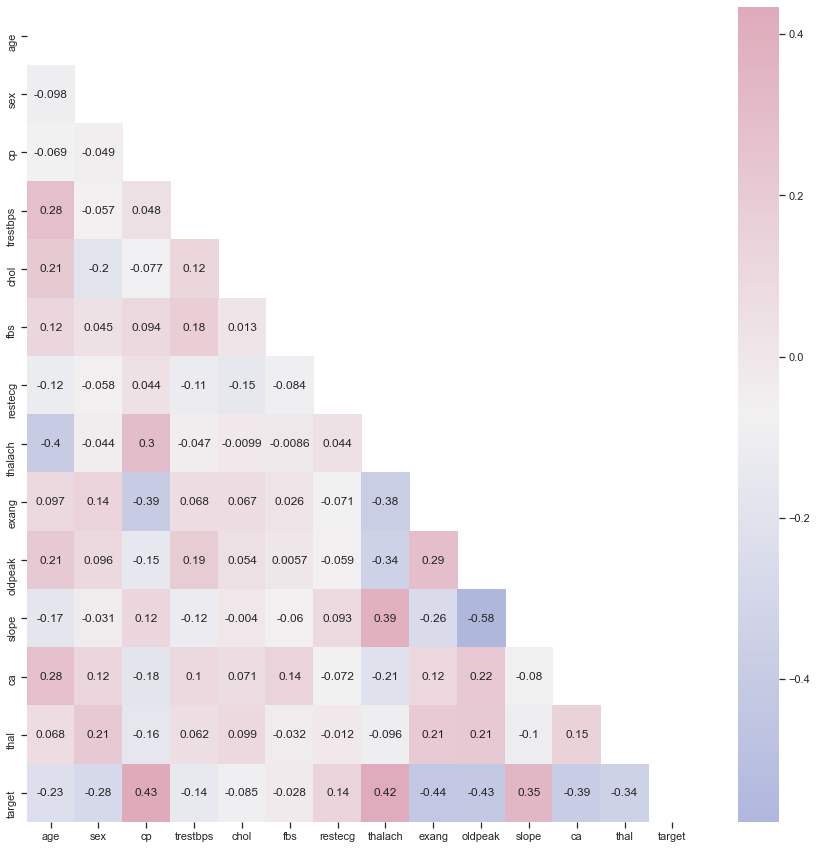

In [15]:
# visualizar correlação entre as variáveis
plt.figure(figsize=(15,15))


corr = df.corr()

cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True,cmap = cmap)
plt.show()

## 3. Aplicação Algoritmos de Machine Learning

### Árvore de Decisão

In [16]:
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [17]:
## Particionando em treinamento e teste
X, y = df.iloc[:,:13], df.iloc[:,13:]
# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

In [18]:
tree_h = DecisionTreeClassifier(random_state=0, criterion='entropy')
tree_h = tree_h.fit(X_train, y_train)
print("Acurácia (base de treinamento):",tree_h.score(X_train, y_train))

y_pred = tree_h.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred ,target_names=["Menor chance H.A","Maior chance H.A"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix,index=["Menor chance H.A","Maior chance H.A"],
                         columns=["Menor chance H.A","Maior chance H.A"])
print(cnf_table)


Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.6739130434782609
                  precision    recall  f1-score   support

Menor chance H.A       0.63      0.83      0.72        23
Maior chance H.A       0.75      0.52      0.62        23

        accuracy                           0.67        46
       macro avg       0.69      0.67      0.67        46
    weighted avg       0.69      0.67      0.67        46

                  Menor chance H.A  Maior chance H.A
Menor chance H.A                19                 4
Maior chance H.A                11                12


In [19]:
tree_h = DecisionTreeClassifier(random_state=0, criterion='entropy',min_samples_leaf =15) #num minimo de amostras em cada folha 
tree_h = tree_h.fit(X_train, y_train)
print("Acurácia (base de treinamento):",tree_h.score(X_train, y_train))

y_pred = tree_h.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred ,target_names=["Menor chance H.A","Maior chance H.A"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix,index=["Menor chance H.A","Maior chance H.A"],
                         columns=["Menor chance H.A","Maior chance H.A"])
print(cnf_table)


Acurácia (base de treinamento): 0.8599221789883269
Acurácia de previsão: 0.7391304347826086
                  precision    recall  f1-score   support

Menor chance H.A       0.70      0.83      0.76        23
Maior chance H.A       0.79      0.65      0.71        23

        accuracy                           0.74        46
       macro avg       0.75      0.74      0.74        46
    weighted avg       0.75      0.74      0.74        46

                  Menor chance H.A  Maior chance H.A
Menor chance H.A                19                 4
Maior chance H.A                 8                15


### Hiperparâmetros - Critério: Entropia

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [21]:
ajuste = DecisionTreeClassifier(random_state=0, 
                              criterion='entropy')

# Grid de hyperparameters 
hypt = {'min_samples_leaf': list(range(1, 21)),
        'min_samples_split':[5,6,7,8,9,10,11,12,13,14,15]                     
       }

# Instantiate a 10-fold CV grid search object 'grid_dt'
trees = GridSearchCV(estimator=ajuste,
          param_grid=hypt,
          scoring='accuracy',
          cv=10)

# Ajuste no conjunto de treinamento
trees.fit(X_train, y_train)

best_hyperparams = trees.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'min_samples_leaf': 20, 'min_samples_split': 5}


In [22]:
tree_h = DecisionTreeClassifier(random_state=0, criterion='entropy',min_samples_leaf =20 ) #num minimo de amostras em cada folha
tree_h = tree_h.fit(X_train, y_train)
print("Acurácia (base de treinamento):",tree_h.score(X_train, y_train))

y_pred = tree_h.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred ,target_names=["Menor chance H.A","Maior chance H.A"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix,index=["Menor chance H.A","Maior chance H.A"],
                         columns=["Menor chance H.A","Maior chance H.A"])
print(cnf_table)


Acurácia (base de treinamento): 0.8599221789883269
Acurácia de previsão: 0.7391304347826086
                  precision    recall  f1-score   support

Menor chance H.A       0.70      0.83      0.76        23
Maior chance H.A       0.79      0.65      0.71        23

        accuracy                           0.74        46
       macro avg       0.75      0.74      0.74        46
    weighted avg       0.75      0.74      0.74        46

                  Menor chance H.A  Maior chance H.A
Menor chance H.A                19                 4
Maior chance H.A                 8                15


### Hiperparâmetros - Critério: Gini

In [23]:
ajuste = DecisionTreeClassifier(random_state=0, 
                              criterion='gini')

# Grid de hyperparameters 
hypt = {'min_samples_leaf': list(range(1, 21)),
        'min_samples_split':[5,6,7,8,9,10,11,12,13,14,15]                     
       }

# Instantiate a 10-fold CV grid search object 'grid_dt'
trees = GridSearchCV(estimator=ajuste,
          param_grid=hypt,
          scoring='accuracy',
          cv=10)

# Ajuste no conjunto de treinamento
trees.fit(X_train, y_train)

best_hyperparams = trees.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'min_samples_leaf': 5, 'min_samples_split': 5}


In [24]:
tree_h = DecisionTreeClassifier(random_state=0, criterion='gini',min_samples_leaf =5)
tree_h = tree_h.fit(X_train, y_train)
print("Acurácia (base de treinamento):",tree_h.score(X_train, y_train))

y_pred = tree_h.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred ,target_names=["Menor chance H.A","Maior chance H.A"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix,index=["Menor chance H.A","Maior chance H.A"],
                         columns=["Menor chance H.A","Maior chance H.A"])
print(cnf_table)


Acurácia (base de treinamento): 0.8949416342412452
Acurácia de previsão: 0.7391304347826086
                  precision    recall  f1-score   support

Menor chance H.A       0.70      0.83      0.76        23
Maior chance H.A       0.79      0.65      0.71        23

        accuracy                           0.74        46
       macro avg       0.75      0.74      0.74        46
    weighted avg       0.75      0.74      0.74        46

                  Menor chance H.A  Maior chance H.A
Menor chance H.A                19                 4
Maior chance H.A                 8                15


A árvore que ajustada com o critério Gini forneceu o melhor ajuste. Acurácia de 89% na base de treinamento e 73% na base de teste. 

In [25]:
text_representation = tree.export_text(tree_h)
print(text_representation)


|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_12 <= 2.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_0 <= 60.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  60.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_9 <= 0.80
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  0.80
|   |   |   |   |   |--- class: 0
|   |   |--- feature_12 >  2.50
|   |   |   |--- feature_9 <= 0.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  0.65
|   |   |   |   |--- class: 0
|   |--- feature_11 >  0.50
|   |   |--- feature_0 <= 63.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  63.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_11 >  0.50
|  

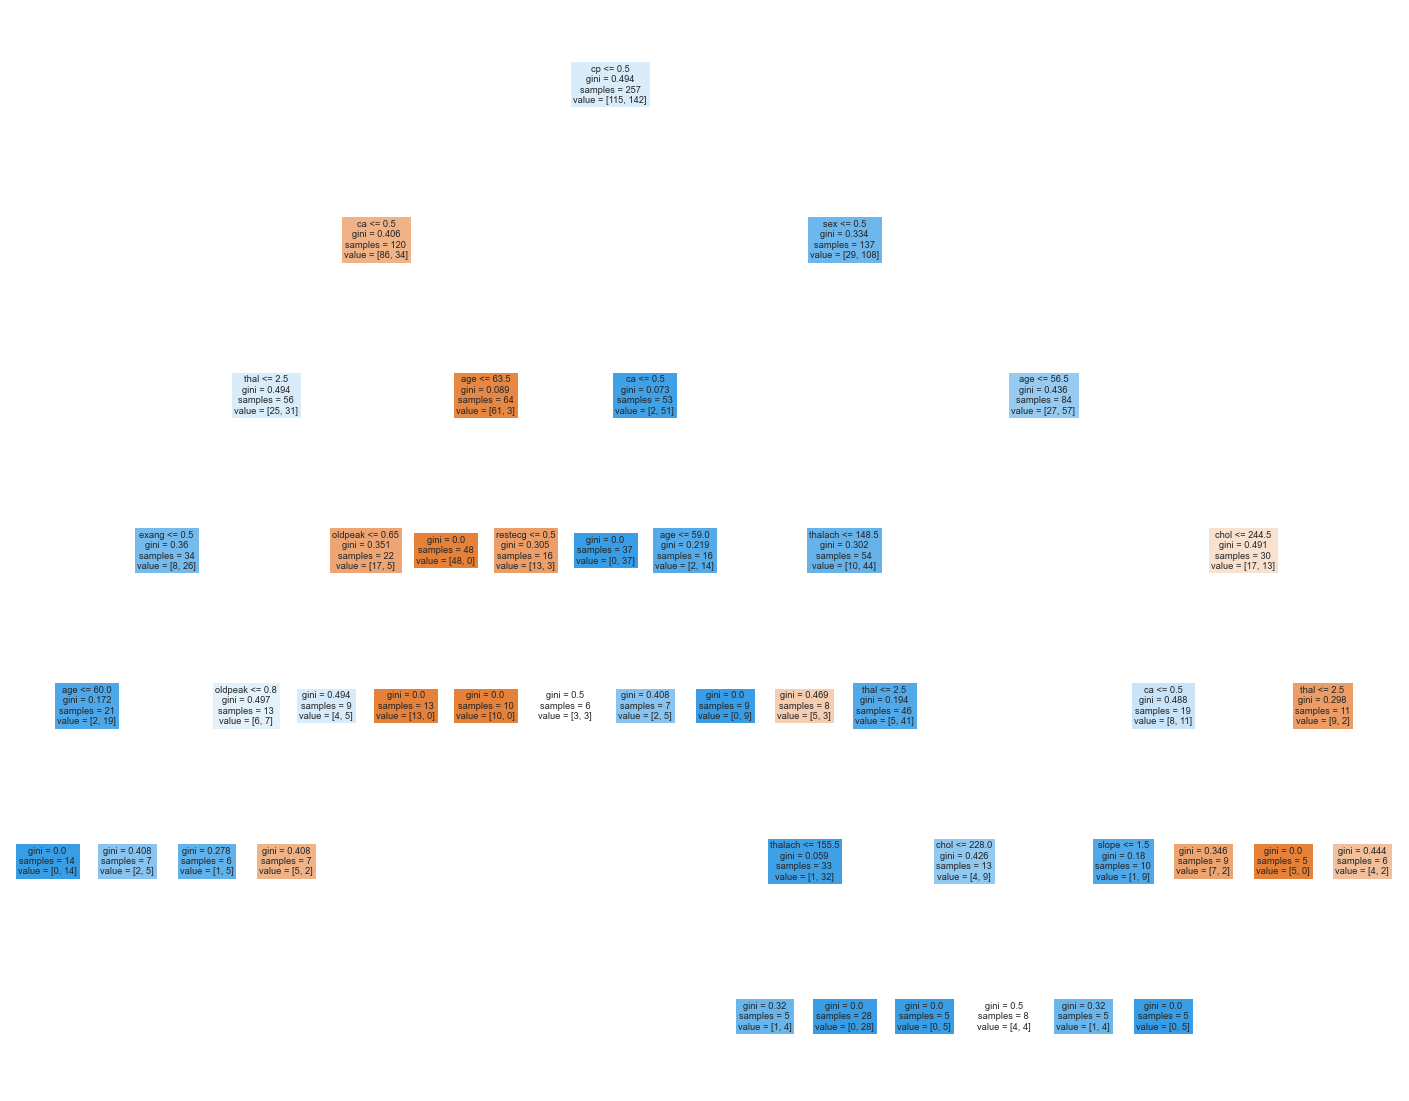

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_h, feature_names=df.columns[:13], filled=True)

### Clusterização

In [27]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics

In [28]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

Text(0.5, 1.0, 'Cluster')

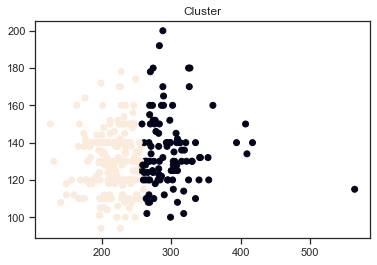

In [29]:
plt.scatter(X["chol"], X["trestbps"], c=y_pred)
plt.title("Cluster")

In [30]:
## Carregando bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

In [31]:
## Ajuste Normalizando os dados

## Definição do número de clusters
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)


In [32]:
df_scaled = df.copy()
df_scaled = df_scaled.iloc[:,:13]
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df_scaled)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [33]:
## Algumas informações do ajuste
labels_ajuste=kmeans.labels_ ## Ajuste dos Labels
centr_clster=kmeans.cluster_centers_ ## Centroide
num_int=kmeans.n_iter_ ## Numero máximo de interações

print("\nCentróides:\n", centr_clster)
print("\nNúmeros máximo de interações:\n", num_int)


Centróides:
 [[-0.24474508 -0.09365982  0.37689522 -0.12984668 -0.05581957 -0.03222358
   0.05775875  0.46140514 -0.4477038  -0.39194396  0.35752014 -0.31168574
  -0.23057503]
 [ 0.45485642  0.1740659  -0.70045622  0.24131882  0.10374014  0.05988722
  -0.10734409 -0.85751711  0.83205329  0.72842416 -0.66444781  0.579265
   0.42852153]]

Números máximo de interações:
 7


In [34]:
dados = pd.concat([df_scaled, y], axis=1, sort=False)

In [35]:
dados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cluster,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,1,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,1,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,1,0


In [36]:
cnf_matrix = confusion_matrix(dados["cluster"],dados["target"])
cnf_table = pd.DataFrame(data=cnf_matrix,index=["Cluster 1","Cluster 2"],
                         columns=["Menor chance H.A","Maior chance H.A"])

In [37]:
cnf_table

,Menor chance H.A,Maior chance H.A
Cluster 1,44,153
Cluster 2,94,12


In [38]:
df_original= pd.concat([df, df_scaled['cluster']], axis=1, sort=False)

In [39]:
df_original

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1


In [40]:
## Estatísticas dos Grupos do Cluster
## Idade
clst_in_media = df_original.groupby(['cluster'], as_index=False)['age'].mean()
clst_in_med = df_original.groupby(['cluster'], as_index=False)['age'].median()
clst_in_max = df_original.groupby(['cluster'], as_index=False)['age'].max()
clst_in_min = df_original.groupby(['cluster'], as_index=False)['age'].min()


print("Idade Média:","\n", clst_in_media)
print("Idade Mediana:","\n",clst_in_med)
print("Idade Máxima:","\n",clst_in_max)
print("Idade Mínima:","\n",clst_in_min)

Idade Média: 
    cluster        age
0        0  52.147208
1        1  58.490566
Idade Mediana: 
    cluster  age
0        0   52
1        1   59
Idade Máxima: 
    cluster  age
0        0   76
1        1   77
Idade Mínima: 
    cluster  age
0        0   29
1        1   35


In [41]:
## Estatísticas dos Grupos do Cluster
## Colesterol
clst_col_media = df_original.groupby(['cluster'], as_index=False)['chol'].mean()
clst_col_med = df_original.groupby(['cluster'], as_index=False)['chol'].median()
clst_col_max = df_original.groupby(['cluster'], as_index=False)['chol'].max()
clst_col_min = df_original.groupby(['cluster'], as_index=False)['chol'].min()


print("Colesterol Média:","\n", clst_col_media)
print("Colesterol Mediana:","\n",clst_col_med)
print("Colesterol Máxima:","\n",clst_col_max)
print("Colesterol Mínima:","\n",clst_col_min)

Colesterol Média: 
    cluster        chol
0        0  243.375635
1        1  251.632075
Colesterol Mediana: 
    cluster  chol
0        0   234
1        1   254
Colesterol Máxima: 
    cluster  chol
0        0   564
1        1   409
Colesterol Mínima: 
    cluster  chol
0        0   126
1        1   131
